# Aprendizaje Automático (Clasificación)
Aprendizaje Autatico (Machine Learning en ingles) se le llama a un conjunto de tecnicas utilizadas para extraer información a partir del análisis de datos automáticamente, usualmente, con el objetivo de poder realizar predicciones sobre datos no conocidos a priori. 
Las tecnicas de aprendizaje automatico estan divididas en de tres grandes grupos: 

* Aprendizaje Supervisado 
* Aprendizaje No Supervisado

## Aprendizaje Supervisado (Práctico Actual)
En este caso, el objetivo es realizar un mapeo a partir de las entradas $x$ hacia la salidas $y$, dado un conjunto de pares de entrada-salida $D=\{(x_i,y_i)\}_{i=1}^N$. $D$ es llamado conjunto de entrenamiento y $N$ es el numero de ejemplos que posee el conjunto $D$.
Normalmente, las entradas $x$ son vectores de dimensión $d$ (En el caso mas simple $d=1$). Cada una de las variables que componen el vector **x** son llamadas atributos (features en ingles). De manera similar, las salidas $y$ pueden ser vectores de dimensión $m$ (el caso mas simple seria con $m=1$), donde los valores de $y$ pueden ser categóricos o nominales (como femenino o masculino), o pueden ser numéricos. En el primero de los casos decimos que el problema es un problema de Clasificación. En el segundo caso decimos que es un problema de regresión. 

![superviced_learning](img/11-superviced_learning.png)

## Aprendizaje No Supervisado (Práctico Siguiente)
En este caso, solo disponemos de datos de entrada $D=\{(x_i)\}_{i=1}^N$ y el objetivo es encontrar patrones interesantes en los datos que nos brinden información relevante. Es tipo de problemas es mucho menos restrictivo que el caso del aprendizaje supervisado, ya que en ningún momento se define que tipos de patrones se buscan en los datos y no hay forma de calcular un error con respecto a un conjunto de pruebas (como es el caso del aprendizaje supervisado) para evaluar si el modelo generado es bueno o malo.

![unsuperviced_learning](img/11-unsupervised_learning.png)

---------------------------------------------------------------------

![steps_predictive_modeling](img/11-Steps_Predictive_Modelling.jpg)

---------------------------------------------------------------------

## 1. Get Data (Obtener Datos)
Este es el proceso de obtener los datos con los cuales vamos a trabajar, para intentar entrenar un modelo predictivo. Estos datos pueden ser:
* Datos climáticos -> Ej. para aprender a predecir si va a llover o no
* Imágenes de rostros -> Ej. para aprender a clasificar si una imagen contiene un rostro o no
* Imágenes varias (perros, gatos, autos, etc.) -> Ej. para aprender a clasificar que objeto hay en una imagen
* Datos de una bolsa de valores -> Ej. para aprender a predecir cuando va a haber un alsa o una baja en la misma

Como nuestro objetivo es poder predecir la etiqueta correcta de datos no vistos, una vez que obtengo mis datos, tengo que dividirlos en 2 conjuntos

![train_test_split](img/11-train_test_split.png)

En este caso generaremos un dataset sintetico:

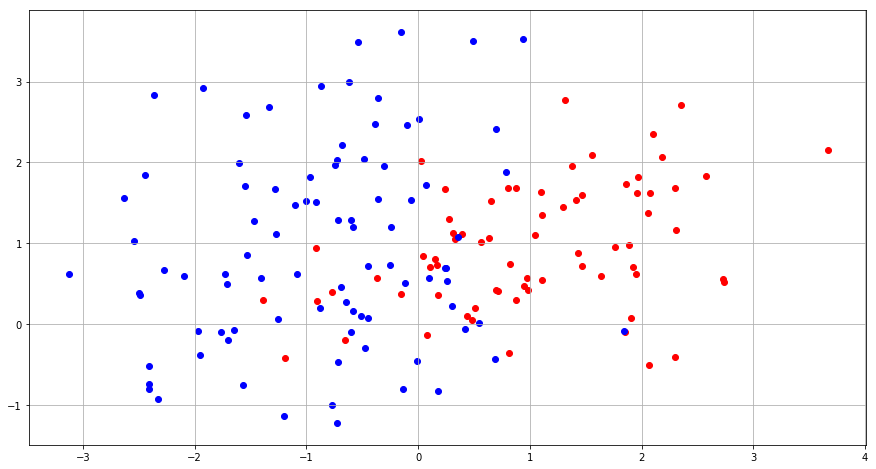

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 8

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generar dataset de pruebas (Toy Example)
# Fijamos una semilla para obtener siempre el mismo resultado
np.random.seed(42)

# Generamos un dataset sintetico con la funcion make_classification de sklearn

X, Y = make_classification(n_samples=200, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_pos, x_neg = X_train[y_train > 0], X_train[y_train <= 0]    
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')    
plt.grid()

## 2. Data Preprocessing (Pre-procesamiento de datos)
### 2.1 Data Scaling
El escalado de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático; pueden comportarse mal si las características de los datos individuales no se parecen, más o menos, a los datos distribuidos normalmente: Distribución Normal/Gaussiana con media cero ($\mu=0$) y varianza unitaria ($\sigma=1$).

En la práctica, a menudo ignoramos la forma de la distribución y simplemente transformamos los datos para centrarlos eliminando el valor medio de cada característica, luego lo escalamos dividiendo las características no constantes por su desviación estándar.

In [2]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [3]:
# Media de los datos de Entrenamiento para cada una de las dimensiones
scaler.mean_             

array([-0.02085124,  0.96062318])

In [4]:
# Desviación estandar de los datos de Entrenamiento para cada una de las dimensiones
scaler.scale_

array([1.37400412, 1.04093395])

In [5]:
# Transformo los datos de entrenamiento (Media=0 y Desviación_Estandar=1)
X_train_scaled = scaler.transform(X_train)   

## 3. Training Model (Entrenamiento del modelo predictivo)

### 3.1 K-Nearest Neighbors (KNN) Classification
La clasificación basada en vecinos mas cercanos es un tipo de aprendizaje supervisado basado en instancias: no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de un voto de mayoría simple de los vecinos más cercanos de cada punto. A un punto de consulta se le asigna la clase de datos que tiene la mayor cantidad de representantes dentro de los vecinos más cercanos del punto.

Un parámetro que debe ser determinado para esta técnica es la cantidad $k$ de vecinos a tener en cuenta para realizar la votación. La elección óptima del valor $k$ depende en gran medida de los datos: en general, una $k$ más grande suprime los efectos del ruido, pero hace que los límites de la clasificación sean menos distintos. Otro parámetro a determinar es un la función de distancia a utilizar. Normalmente se utiliza como medida de distancia la distancia euclidiana $d_e(p,q)=\sqrt{\sum_{n=1}^N (p_n - q_n)^2}$, pero según el problema, otras medidas de distancia pueden ser necesarias.

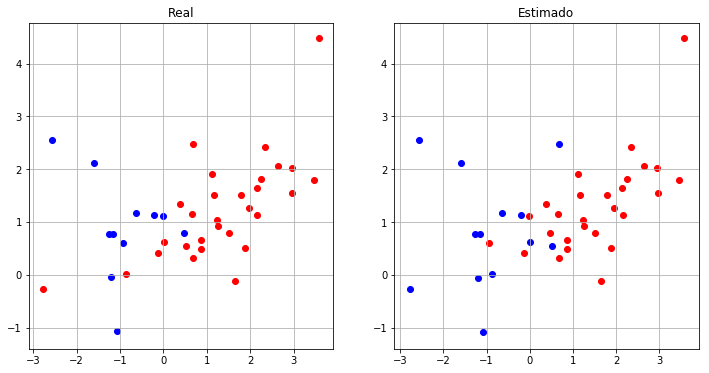

In [6]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
nbrs.fit(X_train_scaled, y_train)

y_predict = nbrs.predict(scaler.transform(X_test))

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x_pos, x_neg = X_test[y_test > 0], X_test[y_test <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.grid()
ax1.set_title("Real")

x_pos, x_neg = X_test[y_predict > 0], X_test[y_predict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax2.grid()    
ax2.set_title("Estimado")

plt.show()

## 4. Test Model (Probar modelo predictivo)
Una vez entrenado el modelo predictivo sobre el conjunto de entrenamiento, es necesario evaluar la performance del mismo sobre datos no conocidos. En otras palabras, evaluar la capacidad de generalización de nuestro modelo predictivo. En esta etapa entra en juego el conjunto de prueba (Test).

![model_metrics](img/11-model_metrics.png)

Una de las herramientas mas simples para evaluar el rendimiento de un predictor es **Accuracy Score**:

$$accuracy(y,\hat{y})=\frac{1}{N}\sum_{i=1}^N 1(\hat{y}_i=y_i)$$

Antes de probar los modelos, debemos aplicar a los datos de test, todo las etapas de pre-procesamiento aplicada a los datos de entrenamiento. 
En nuestro caso, por ahora, solo implica escalar los datos  restándole la media y dividendo por la varianza de cada uno de los features:

In [7]:
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.metrics import accuracy_score

# Accuracy de KNeighborsClassifier
accuracy_knn = accuracy_score(y_test, nbrs.predict(X_test_scaled))

print('Accuracy KNN: {}'.format(accuracy_knn))

Accuracy KNN: 0.8


## Ejercicios 
Implementar KNN y evaluarlo con el dataset iris graficado a continuacion:

(150, 4)
(150,)


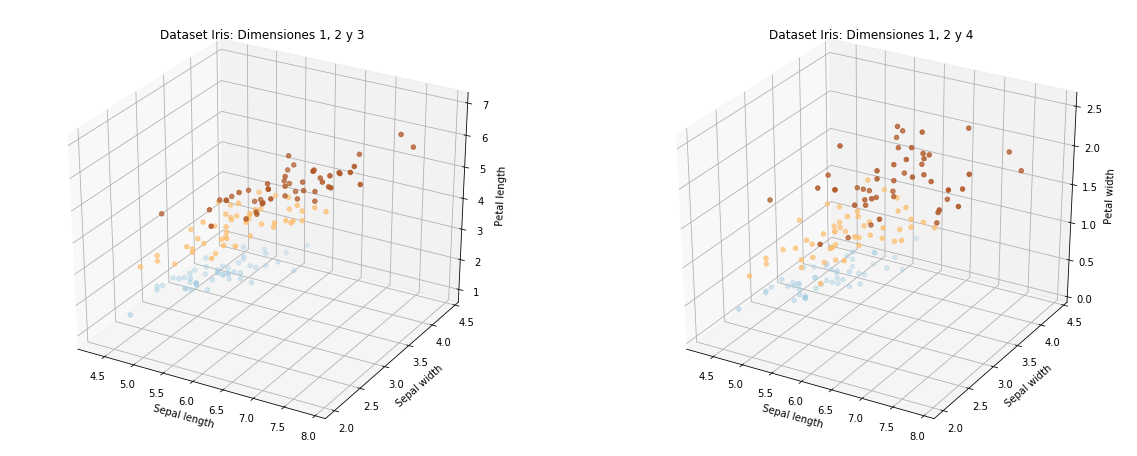

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.set_title("Dataset Iris: Dimensiones 1, 2 y 3 ")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired)
ax1.set_xlabel('Sepal length')
ax1.w_xaxis.set_ticklabels
ax1.set_ylabel('Sepal width')
ax1.w_yaxis.set_ticklabels
ax1.set_zlabel('Petal length')
ax1.w_zaxis.set_ticklabels

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("Dataset Iris: Dimensiones 1, 2 y 4 ")
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=y, cmap=plt.cm.Paired)
ax2.set_xlabel('Sepal length')
ax2.w_xaxis.set_ticklabels
ax2.set_ylabel('Sepal width')
ax2.w_yaxis.set_ticklabels
ax2.set_zlabel('Petal width')
ax2.w_zaxis.set_ticklabels

plt.show()

In [13]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

class KNN:
    def __init__(self, X, y, k):   
        self.dataset = X # puntos del dataset
        self.target = y # clase de cada punto en el dataset
        self.k = k # cantidad de vecinos a evaluar
    
    def knn_predict(X):
        # Implementar método para estimar la pertenencia de un determinado punto X[i] 
        # a uno de las clases de los datos del dataset almacenados en dataset y target previamente.
        # Utilizar la función cdist(XA, XB) para computar distancias entre dos arreglos XA y XB en donde 
        # muestras están ordenadas por filas.
        
        # La salida de esta función debe ser un vector con la clase correspondiente a cada punto, determinada
        # en base a la clase de los k vecinos mas cercanos.
        
        # En el caso de empate en la cantidad de vecinos de cada clase, retornar como clase, para el punto 
        # en cuestion, la clase del vecino mas cercano. 
        
        #prediction = ...

        return prediction